In [1]:
!pip install qutip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 4.7 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


Reference:  [Qutip lecture: Superconducting Josephson charge qubit](https://github.com/jrjohansson/qutip-lectures/blob/master/Lecture-11-Charge-Qubits.ipynb)

 Introduction

 The Hamiltonian for a Josephson charge qubit is,

 $$H = \sum_n 4 E_C (n_g - n)^2 |n\rangle\langle n| - \frac{1}{2} E_J \sum_n(|n+1\rangle\langle n| + |n\rangle\langle n+1| )$$

 where $E_C$ is the charge energy, $E_J$ is the Josephson energy, and $| n\rangle$ is the charge state with $n$ Cooper-pairs on the island that makes up the charge qubit.
      

    

In [9]:
def hamiltonian(Ec, Ej, N, ng):
  m= np.diag(4*Ec*(ng- np.arange(-N,N+1))**2) - 0.5 * Ej * (np.diag(-np.ones(2*N), 1) +  np.diag(-np.ones(2*N), -1))
  return Qobj(m)

def plot_energies(ng_vec, energies, ymax=(20,3)):
  fig, axes = plt.subplots(1,2,figsize=(16,6))

  for i in range(len(energies[0,:])):
    axes[0].plot(ng_vec, energies[:,i])
  axes[0].set_ylim(-2, ymax[0])
  axes[0].set_xlabel(r'$n_g$', fontsize=18)
  axes[0].set_ylabel(r'$E_n$', fontsize=18)

  for i in range(len(energies[0,:])):
    axes[1].plot(ng_vec, (energies[:,i]-energies[:,0])/(energies[:,1]-energies[:,0]))
  axes[1].set_ylim(-0.1, ymax[1])
  axes[1].set_xlabel(r'$n_g$', fontsize=18)
  axes[1].set_ylabel(r'($E_n$-$E_0$)/($E_1$-$E_0$)', fontsize=18)
  return fig, axes

def visualize_dynamics(result,ylabel):
  fig,ax=plt.subplots(figsize=(12,5))
  ax.plot(result.times, result.expect[0])

  ax.set_ylabel(ylabel,fontsize=16)
  ax.set_xlabel(r't', fontsize=16)



In [7]:
N = 10
Ec =1.0
Ej = 1.0

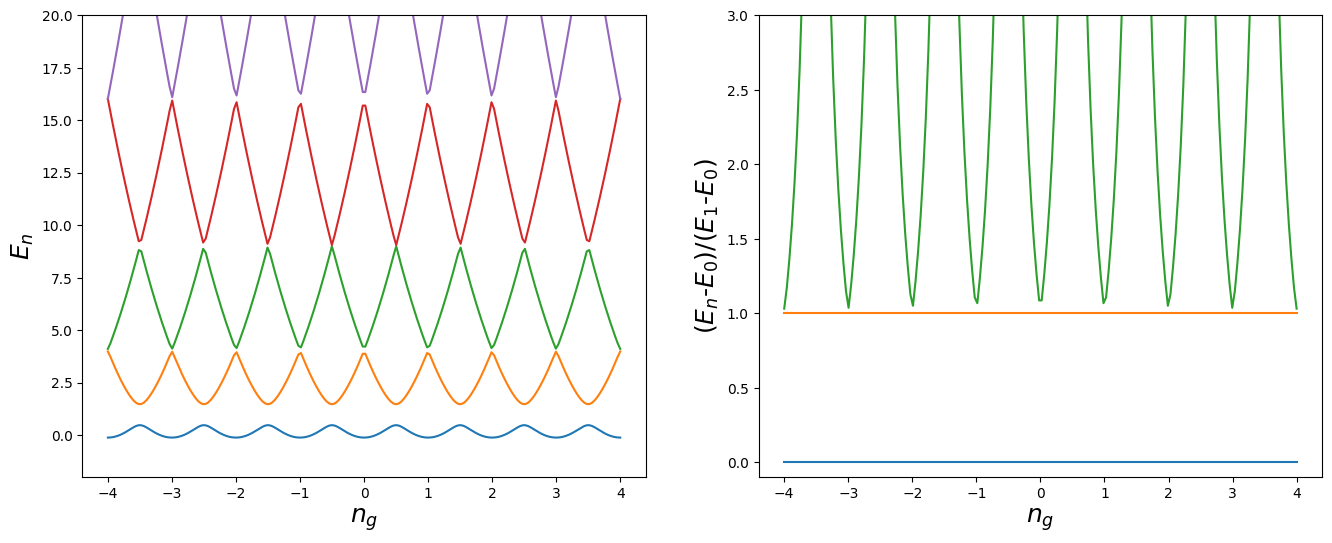

In [11]:
ng_vec = np.linspace(-4,4,200)
energies = np.array([hamiltonian(Ec, Ej, N, ng).eigenenergies() for ng in ng_vec])
plot_energies(ng_vec, energies);
